In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'telco-customer-churn:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F13996%2F18858%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240310%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240310T204009Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D312292e0b141d0a9b26e4a7b1c638c5b42bd8e0b26e899c95e8b346a5521ef3fc189e0b9e4038d1e6325a04aa0983e63a625531d8fa4a6ace19000dd3fd7f63401e5ccc4d1efc6e9b235fe8c5a7805259daed81233bf53a5ca02d1815454cfae05accd837bf90aeb94802fdb8a3c626cc948d0351865c7fec2abd1e7c698d56c6052d3a8662731552456d1c2fa1dbf52f2a6982d18b2750bf53db7421fef9870fae7013160dfd468bdf1d6eb69ed22c64e0538399ee1a0f89886b72c8d58f8cd5f820e0402e7515be10b59fa38bc91d032688eeb8ff002e4e6a52f7080684a10402819de1748c3d293618790fece99b0d1b0712e86508ec05d0b9d429ee47a3e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 175758 bytes downloaded
Downloaded and uncompressed: telco-customer-churn
Data source import complete.


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:300%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><u><b>CUSTOMER CHURN PREDICTION</b></u>
</div>


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>IMPORT NEEDED LIBRARIES </b>
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET LOADING ... </b>
</div>

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DISPLAY A SAMPLE ... </b>
</div>

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
704,1456-TWCGB,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.25,208.45,No
5620,5286-YHCVC,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,7470.1,No
1492,3254-YRILK,Male,1,No,No,19,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.20,1775.8,Yes
5002,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
303,8181-YHCMF,Female,0,Yes,Yes,68,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),60.30,4109,No


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET GENERAL INFORMATION </b>
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA PRE-PROCESSING ... </b>
</div>

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>CustomerID </b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Drop customerID column as it is useless for the Model
   
    


In [7]:
df.drop('customerID',axis='columns',inplace=True)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Gender </b>
</div>

In [8]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

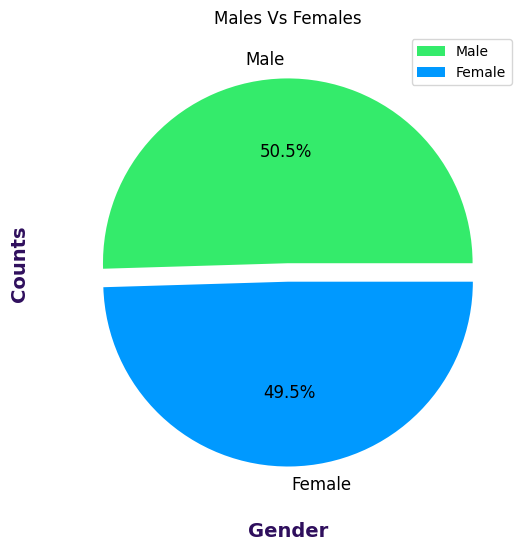

In [9]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'Male' to 0 and 'Female' to 1


In [10]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Partner </b>
</div>

In [11]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

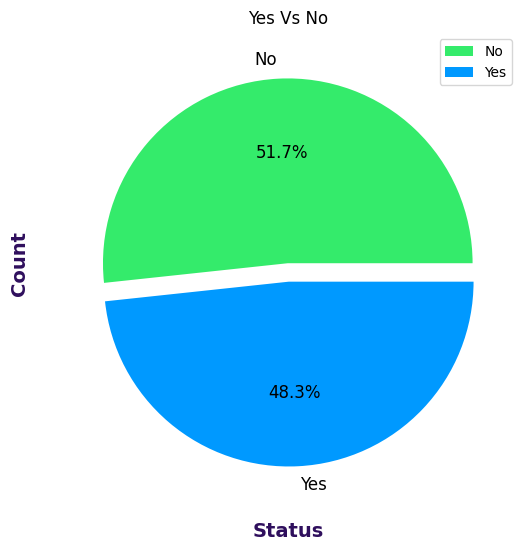

In [12]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["Partner"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Yes Vs No')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1


In [13]:
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b> Dependents </b>
</div>

In [14]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

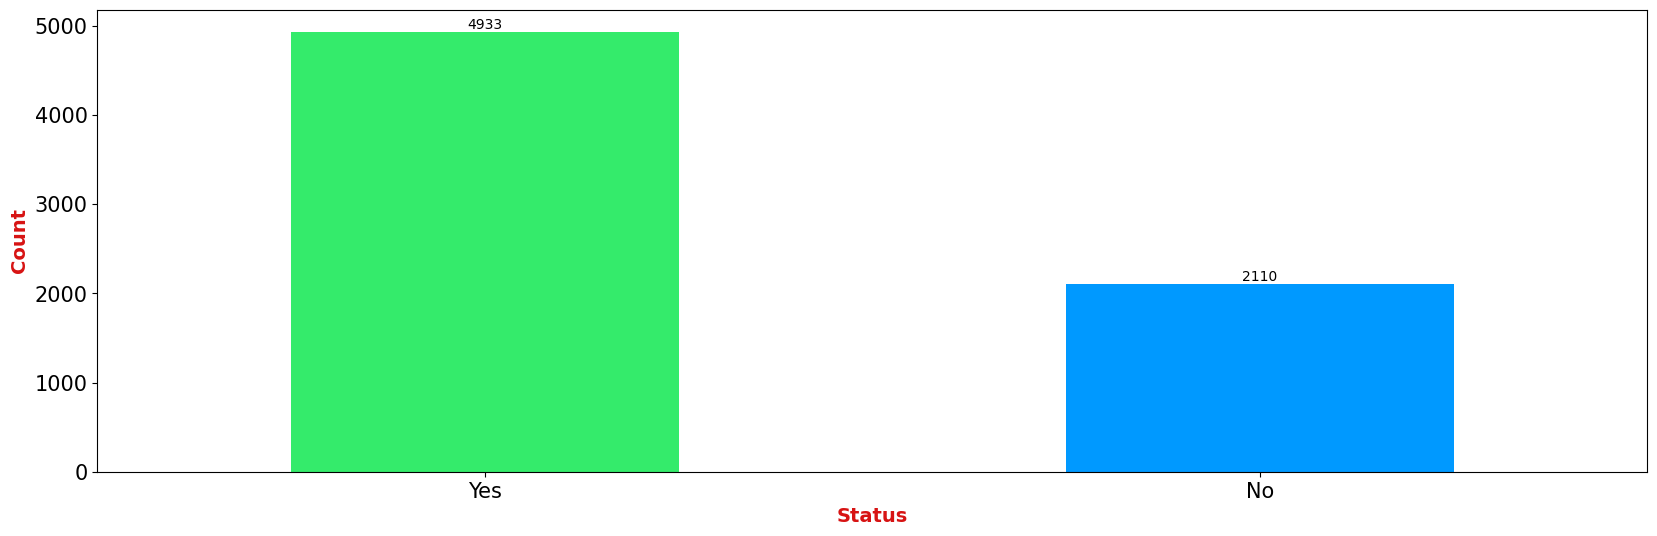

In [15]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["Dependents"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1


In [17]:
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>PhoneService </b>
</div>

In [18]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

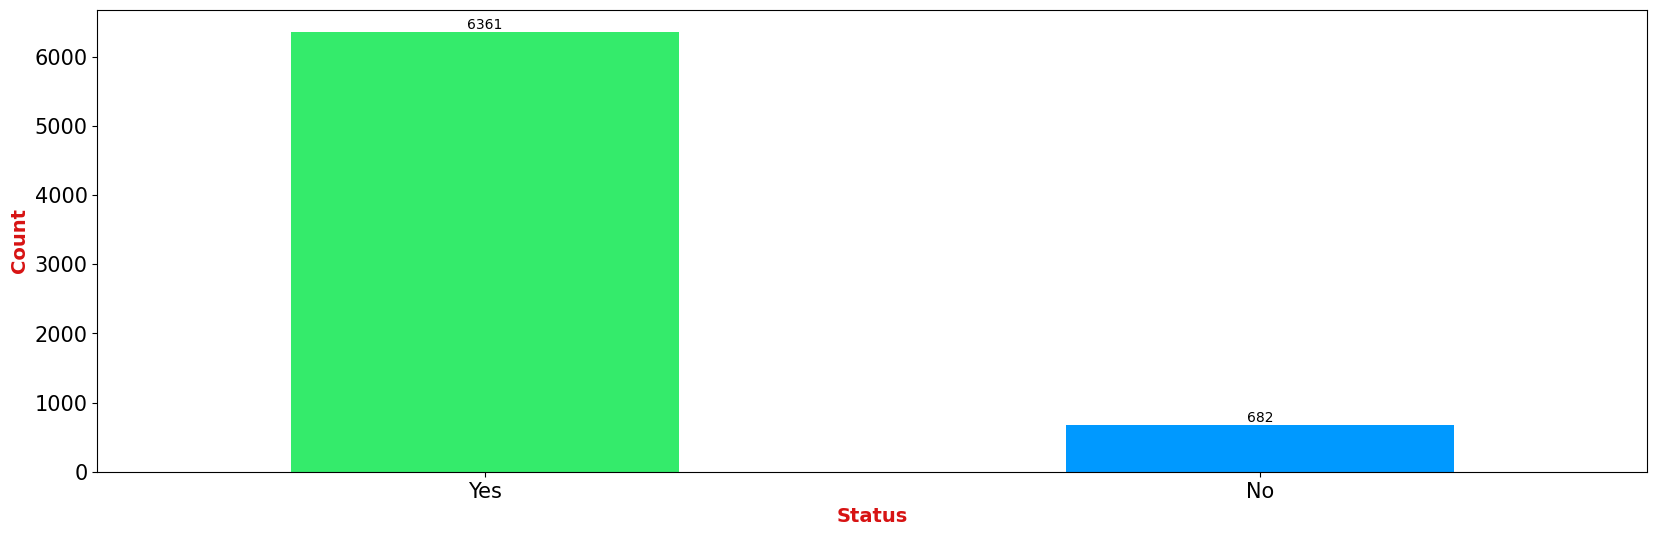

In [19]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["PhoneService"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1


In [20]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MultipleLines </b>
</div>

In [21]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

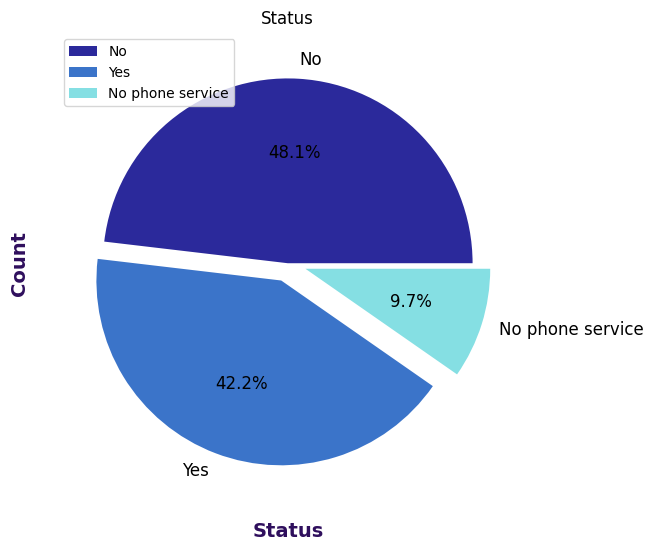

In [22]:
colors = ["#2B299B" , "#3B74C9" , "#85DFE3"]

plt.figure(figsize = (20, 6))

counts = df["MultipleLines"].value_counts()
explode = (0, 0.1  , 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Status')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

    
 Convert 'No phone service' to 0 &  Convert 'No' to 0 and 'Yes' to 1


In [23]:
mapping_dict = {'No phone service': 0, 'No': 0, 'Yes': 1}

df['MultipleLines'] = df['MultipleLines'].map(mapping_dict)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>[InternetService, Contract, PaymentMethod] </b>
</div>

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Using sklearn OneHotEncoder </b>
</div>

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df.InternetService = le.fit_transform(df.InternetService)

In [26]:
df.Contract = le.fit_transform(df.Contract)

In [27]:
df.PaymentMethod = le.fit_transform(df.PaymentMethod)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DISPLAT ANOTHER SAMPLE .. </b>
</div>

In [28]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1493,0,0,0,NaN,11,1,0,1,Yes,No,Yes,No,No,No,0,Yes,0,79.50,795.65,No
4149,0,0,1,NaN,71,0,0,0,No,Yes,No,No,Yes,Yes,2,No,2,49.35,3515.25,Yes
2001,1,0,0,NaN,5,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,No,3,20.15,117.95,No
5460,0,0,1,NaN,34,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,1,20.05,679,No


<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

    
To avoid redundancy, One function to pre-process them all


In [29]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [30]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>TotalCharges</b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

Check the Null Values ...    


In [31]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [32]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,NaN,0,0,0,0,1,0,1,1,1,0,2,1,0,52.55,,0
753,0,0,0,NaN,0,1,0,2,0,0,0,0,0,0,2,0,3,20.25,,0
936,1,0,1,NaN,0,1,0,0,1,1,1,0,1,1,2,0,3,80.85,,0
1082,0,0,1,NaN,0,1,1,2,0,0,0,0,0,0,2,0,3,25.75,,0
1340,1,0,1,NaN,0,0,0,0,1,1,1,1,1,0,2,0,1,56.05,,0
3331,0,0,1,NaN,0,1,0,2,0,0,0,0,0,0,2,0,3,19.85,,0
3826,0,0,1,NaN,0,1,1,2,0,0,0,0,0,0,2,0,3,25.35,,0
4380,1,0,1,NaN,0,1,0,2,0,0,0,0,0,0,2,0,3,20.00,,0
5218,0,0,1,NaN,0,1,0,2,0,0,0,0,0,0,1,1,3,19.70,,0
6670,1,0,1,NaN,0,1,1,0,0,1,1,1,1,0,2,0,3,73.35,,0


In [33]:
df.shape

(7043, 20)

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

Remove rows with space in TotalCharges    


In [34]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MinMaxScaler</b>
</div>

In [35]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [36]:
df[cols_to_scale ].sample(5)

,tenure,MonthlyCharges,TotalCharges
3503,0.915493,0.855721,0.789499
3024,0.112676,0.021393,0.019075
3011,0.112676,0.014925,0.022138
435,0.352113,0.260697,0.134433
478,0.056338,0.774627,0.050150


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET FINAL SUMMARY </b>
</div>

In [37]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
gender,int64,0,0.000000,2,7032
SeniorCitizen,int64,0,0.000000,2,7032
Partner,int64,0,0.000000,2,7032
Dependents,float64,7032,1.000000,0,0
tenure,float64,0,0.000000,72,7032
PhoneService,int64,0,0.000000,2,7032
MultipleLines,int64,0,0.000000,2,7032
InternetService,int64,0,0.000000,3,7032
OnlineSecurity,int64,0,0.000000,2,7032
OnlineBackup,int64,0,0.000000,2,7032


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Determine Predictor & Target</b>
</div>

In [38]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [39]:
X.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5970,0,0,1,NaN,0.056338,1,1,1,1,0,0,0,0,1,0,1,2,0.705473,0.045517
2079,0,0,1,NaN,0.971831,1,1,1,1,1,0,0,1,1,0,1,2,0.873632,0.869519
5644,0,0,1,NaN,0.000000,1,0,1,0,0,1,0,0,0,0,0,2,0.576617,0.006624


In [40]:
y.sample(3)

2643    1
2974    1
3378    0
Name: Churn, dtype: int64

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA SPLIT ...</b>
</div>

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [42]:
X_train.shape

(5625, 19)

In [43]:
X_test.shape

(1407, 19)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>BUILDING THE ANN MODEL </b>
</div>

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7403
Epoch 11/100
176/17

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL EVALUATION </b>
</div>

In [47]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7100


[nan, 0.7100213170051575]

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL METRICS </b>
</div>

In [48]:
from sklearn.metrics import confusion_matrix , classification_report

In [49]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 1ms/step


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       999
           1       0.00      0.00      0.00       408

    accuracy                           0.71      1407
   macro avg       0.36      0.50      0.42      1407
weighted avg       0.50      0.71      0.59      1407



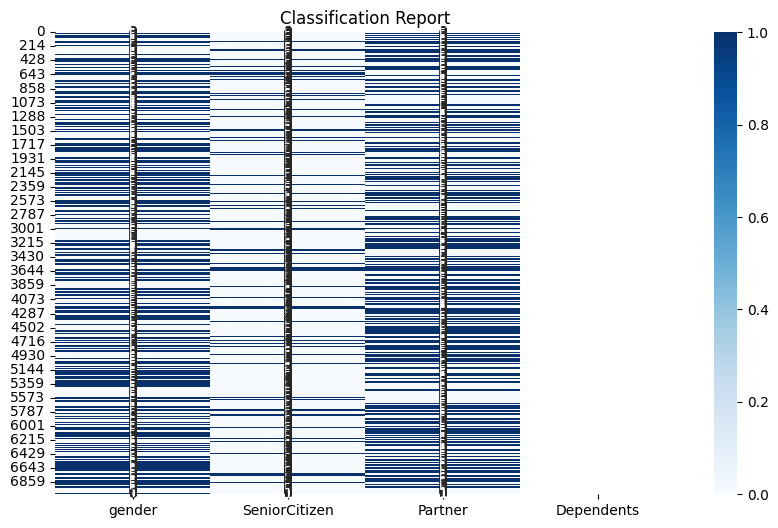

In [51]:
report = classification_report(y_test, y_pred, output_dict=True)
rep = pd.DataFrame(report).transpose()

# Create a heatmap of the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :4], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [52]:
# Extract metrics for each class
classes = [str(key) for key in range(len(report) - 3)]  # Extract class labels
precision = [report[key]['precision'] for key in classes]
recall = [report[key]['recall'] for key in classes]
f1_score = [report[key]['f1-score'] for key in classes]

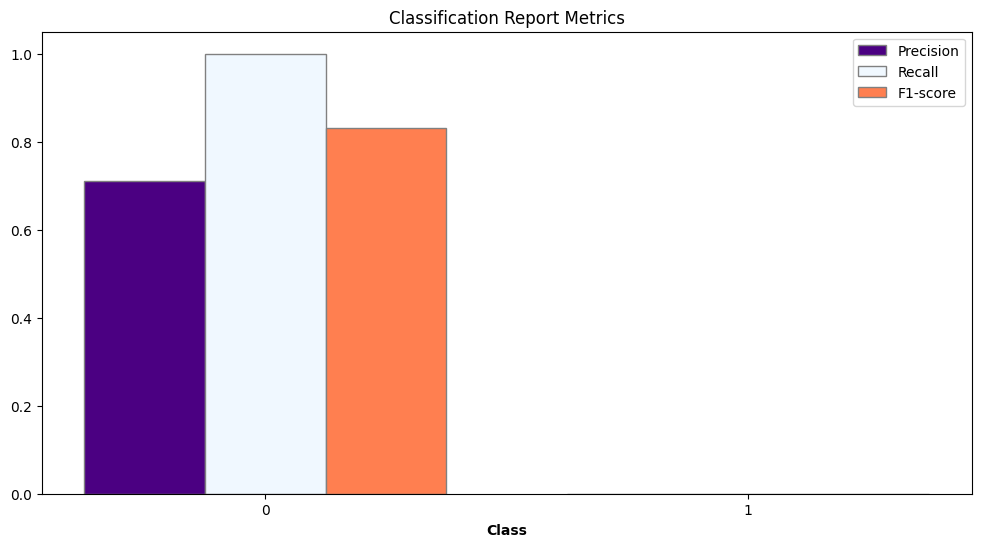

In [53]:
# Plotting the metrics using a bar chart
plt.figure(figsize=(12, 6))
barWidth = 0.25
r1 = range(len(classes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision, color='#4b0082', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='#f0f8ff', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='#ff7f50', width=barWidth, edgecolor='grey', label='F1-score')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(classes))], classes)
plt.legend()
plt.title("Classification Report Metrics")
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

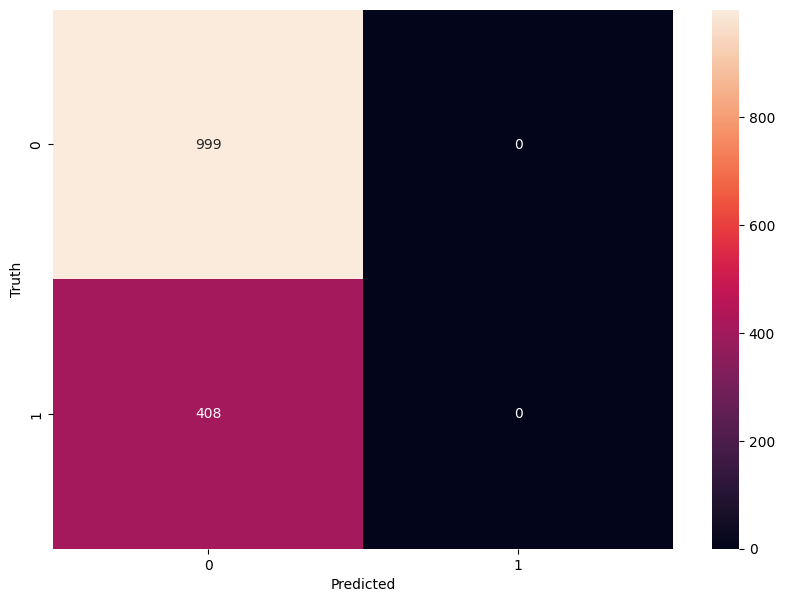

In [54]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')